<a href="https://colab.research.google.com/github/AlexCHEN-Engineer/CEE314HW/blob/main/CEE314_FirstTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install the fenics library.
**Do not modify it**

In [1]:
%time
# Do not revise here. 
try:
    import google.colab
except ImportError:
    import ufl
    import dolfin
    import mshr
else:
    try:
        import ufl
        import dolfin
        import mshr
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import ufl
        import dolfin
        import mshr

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


# Import necessay Python modules or function to use. 

In [2]:
# All FEM related functions and class.
from dolfin import *

# To plot the data.
import matplotlib.pyplot as plt

# Define the mesh

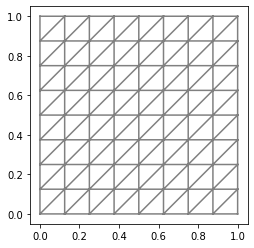

In [3]:
# Create mesh and define function space
# We define a square with 1x1 with 128 triangles.
mesh = UnitSquareMesh(8, 8)

# Use first order polynomial interpolation.
V = FunctionSpace(mesh, 'P', 1)
plot(mesh)

## FEM formulation
In this tutorial, we are solving a partial differential equation with the following (S) strong form. For $u:\Omega→\mathbb{R}$ with boundary $\partial\Omega = \Gamma = \Gamma_D\cup\Gamma_N$: 
\begin{equation}
\begin{aligned}
& -\nabla^2 u = f\quad in\quad \Omega \\
& u = 0 \quad on \quad \Gamma_D \\
& \nabla u \cdot \boldsymbol{n} = g \quad on \quad \Gamma_N
\end{aligned}
\end{equation}


According to the strong form, we develop the variational formulation as
\begin{equation}
\begin{aligned}
 0 & = \int_{\Omega}\nabla^2 u \delta u dV + \int_\Omega f\delta udV\\
   & = \int_{\Omega}\nabla\cdot(\nabla u \delta u) dV - \int_{\Omega}\nabla u\cdot\nabla\delta u dV + \int_\Omega f\delta udV \\
  & = - \int_{\Omega}\nabla u\cdot\nabla\delta u dV + \int_\Omega f\delta udV + \int_{\Gamma_D}g\delta u dA 
\end{aligned}
\end{equation}

Thus, we get our variational formulation above.

## Define the Dirichlet and Neumann BCs

In [4]:
# This defins the dirichlet boundary conditions
def boundary_D(x):
  return x[0] < DOLFIN_EPS or x[0] > 1-DOLFIN_EPS

## Construct the variational formulation

In [5]:
# Define boundary condition
u_D = Expression('t', degree = 1, t = 0)

bcs = DirichletBC(V, u_D, boundary_D)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(5.0)
g = Constant(10.)
a = dot(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

## Solve and postprocessing

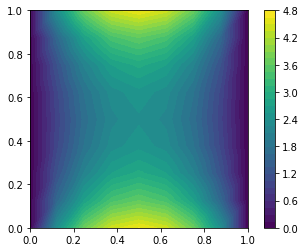

In [6]:
# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Save solution to file in VTK format
# vtkfile = File('poisson/solution.pvd')
# vtkfile << u
# Hold plot
c=plot(u)
plt.colorbar(c)
plt.show()

## Get access to the value at any point within the domain

In [7]:
u(0.5, 0.5)

2.3696608956132317